In [1]:
import pandas as pd

datasets = {
    "patients": pd.read_csv("patients.csv"),
    "ADMISSIONS": pd.read_csv("ADMISSIONS.csv"),
    "ICUSTAYS": pd.read_csv("ICUSTAYS.csv"),
    "CHARTEVENTS": pd.read_csv("CHARTEVENTS.csv"),
    "LABEVENTS": pd.read_csv("LABEVENTS.csv"),
    "PRESCRIPTIONS": pd.read_csv("PRESCRIPTIONS.csv"),
    "DIAGNOSES_ICD": pd.read_csv("DIAGNOSES_ICD.csv"),
    "NOTEEVENTS": pd.read_csv("NOTEEVENTS.csv"),
    "CPTEVENTS": pd.read_csv("CPTEVENTS.csv"),
    "OUTPUTEVENTS": pd.read_csv("OUTPUTEVENTS.csv"),
}

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3700576556.py:7: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  "CHARTEVENTS": pd.read_csv("CHARTEVENTS.csv"),
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3700576556.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  "PRESCRIPTIONS": pd.read_csv("PRESCRIPTIONS.csv"),
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3700576556.py:12: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  "CPTEVENTS": pd.read_csv("CPTEVENTS.csv"),


In [2]:
# Dataset Information
def display_dataset_info(df, name):
    print(f"\n {name} Dataset")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("-" * 50)
    
for name, df in datasets.items():  # Looping through each dataset and display info
    display_dataset_info(df, name)



 patients Dataset
Shape: (10000, 8)

First 5 rows:
   ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0       1           2      M  2138-07-17 00:00:00                  NaN   
1       2           3      M  2025-04-11 00:00:00  2102-06-14 00:00:00   
2       3           4      F  2143-05-12 00:00:00                  NaN   
3       4           5      M  2103-02-02 00:00:00                  NaN   
4       5           6      F  2109-06-21 00:00:00                  NaN   

  DOD_HOSP              DOD_SSN  EXPIRE_FLAG  
0      NaN                  NaN            0  
1      NaN  2102-06-14 00:00:00            1  
2      NaN                  NaN            0  
3      NaN                  NaN            0  
4      NaN                  NaN            0  

Missing Values:
ROW_ID            0
SUBJECT_ID        0
GENDER            0
DOB               0
DOD            6239
DOD_HOSP       7808
DOD_SSN        6562
EXPIRE_FLAG       0
dtype: int64
-------------------------------

ROW_ID                    0
SUBJECT_ID                0
HADM_ID                   0
ICUSTAY_ID           362704
STARTDATE               151
ENDDATE                 746
DRUG_TYPE                 0
DRUG                      0
DRUG_NAME_POE        400579
DRUG_NAME_GENERIC    399697
FORMULARY_DRUG_CD       507
GSN                  112739
NDC                    1397
PROD_STRENGTH           163
DOSE_VAL_RX             156
DOSE_UNIT_RX            153
FORM_VAL_DISP           159
FORM_UNIT_DISP          187
ROUTE                   110
dtype: int64
--------------------------------------------------

 DIAGNOSES_ICD Dataset
Shape: (118300, 5)

First 5 rows:
   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0       1           2   163353      1.0     V3001
1       2           2   163353      2.0      V053
2       3           2   163353      3.0      V290
3      12           3   145834      9.0      2639
4      10           3   145834      7.0      6826

Missing Values:
ROW_ID         0
SUBJECT_ID  

In [3]:
# Data Cleaning
patients = datasets["patients"]

# Converting datetime columns
patients['DOB'] = pd.to_datetime(patients['DOB'])
patients['DOD'] = pd.to_datetime(patients['DOD'], errors='coerce')
patients['DOD_HOSP'] = pd.to_datetime(patients['DOD_HOSP'], errors='coerce')
patients['DOD_SSN'] = pd.to_datetime(patients['DOD_SSN'], errors='coerce')

# Filling missing values
patients['DOD_HOSP'] = patients['DOD_HOSP'].fillna("Alive")
patients['DOD_SSN'] = patients['DOD_SSN'].fillna("Alive")


In [4]:
# ADMISSIONS.csv

admissions = datasets["ADMISSIONS"]

# Convert datetime columns
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'])
admissions['DEATHTIME'] = pd.to_datetime(admissions['DEATHTIME'], errors='coerce')

# Fill missing values
admissions['LANGUAGE'] = admissions['LANGUAGE'].fillna("Unknown")
admissions['MARITAL_STATUS'] = admissions['MARITAL_STATUS'].fillna("Unknown")
admissions['EDREGTIME'] = pd.to_datetime(admissions['EDREGTIME'], errors='coerce')
admissions['EDOUTTIME'] = pd.to_datetime(admissions['EDOUTTIME'], errors='coerce')

In [5]:
icustays = datasets["ICUSTAYS"]

# Convert datetime columns
icustays['INTIME'] = pd.to_datetime(icustays['INTIME'])
icustays['OUTTIME'] = pd.to_datetime(icustays['OUTTIME'])

In [6]:
#CHARTEVENTS.csv
chartevents = datasets["CHARTEVENTS"]

# Converting datetime columns
chartevents['charttime'] = pd.to_datetime(chartevents['charttime'])
chartevents['storetime'] = pd.to_datetime(chartevents['storetime'], errors='coerce')
chartevents = chartevents.dropna(subset=['valuenum'])
chartevents = chartevents.drop(columns=['warning', 'error', 'resultstatus', 'stopped'])

In [7]:
#LABEVENTS.csv
labevents = datasets["LABEVENTS"]
labevents = labevents.dropna(subset=['HADM_ID']) # Drop rows with missing vals
labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])
labevents = labevents.dropna(subset=['VALUENUM'])
labevents = labevents.drop(columns=['VALUEUOM', 'FLAG'])

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/1670203922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])


In [8]:
print("Available columns in LABEVENTS:", labevents.columns)
columns_to_drop = ['VALUEUNOM', 'flag']
existing_columns = [col for col in columns_to_drop if col in labevents.columns]
labevents = labevents.drop(columns=existing_columns)

Available columns in LABEVENTS: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUE',
       'VALUENUM'],
      dtype='object')


In [9]:
columns_to_drop = ['VALUEUOM', 'FLAG'] # Dropping columns using correct names
existing_columns = [col for col in columns_to_drop if col in labevents.columns]
labevents = labevents.drop(columns=existing_columns)

In [10]:
patients.to_csv('PATIENTS_cleaned.csv', index=False)
admissions.to_csv('ADMISSIONS_cleaned.csv', index=False)
icustays.to_csv('ICUSTAYS_cleaned.csv', index=False)
chartevents.to_csv('CHARTEVENTS_cleaned.csv', index=False)
labevents.to_csv('LABEVENTS_cleaned.csv', index=False)

In [11]:
merged_data = pd.merge(patients, admissions, on='SUBJECT_ID', how='inner')
merged_data = pd.merge(merged_data, icustays, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
merged_data.to_csv('MERGED_DATA.csv', index=False)

In [12]:
merged_data['AGE'] = (merged_data['ADMITTIME'].dt.year - merged_data['DOB'].dt.year)
merged_data['LOS_DAYS'] = (merged_data['DISCHTIME'] - merged_data['ADMITTIME']).dt.days
merged_data['ADMIT_HOUR'] = merged_data['ADMITTIME'].dt.hour
merged_data['ADMIT_DAYOFWEEK'] = merged_data['ADMITTIME'].dt.day_name()
merged_data.to_csv('MERGED_DATA_cleaned_final.csv', index=False)

In [13]:
def check_null_values(df, name):
    print(f"\n===== Null Values in {name} =====")
    print(df.isnull().sum())


patients_cleaned = pd.read_csv('PATIENTS_cleaned.csv')
admissions_cleaned = pd.read_csv('ADMISSIONS_cleaned.csv')
icustays_cleaned = pd.read_csv('ICUSTAYS_cleaned.csv')
chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned.csv')
labevents_cleaned = pd.read_csv('LABEVENTS_cleaned.csv')
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv')


check_null_values(patients_cleaned, "PATIENTS")
check_null_values(admissions_cleaned, "ADMISSIONS")
check_null_values(icustays_cleaned, "ICUSTAYS")
check_null_values(chartevents_cleaned, "CHARTEVENTS")
check_null_values(labevents_cleaned, "LABEVENTS")
check_null_values(merged_data, "MERGED_DATA")

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/1927064154.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned.csv')



===== Null Values in PATIENTS =====
ROW_ID            0
SUBJECT_ID        0
GENDER            0
DOB               0
DOD            6239
DOD_HOSP          0
DOD_SSN           0
EXPIRE_FLAG       0
dtype: int64

===== Null Values in ADMISSIONS =====
ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               11624
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                    0
RELIGION                  183
MARITAL_STATUS              0
ETHNICITY                   0
EDREGTIME                6979
EDOUTTIME                6979
DIAGNOSIS                   8
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

===== Null Values in ICUSTAYS =====
ROW_ID            0
SUBJECT_ID        0
HADM_ID           0
ICUSTAY_ID        0
DBSOURCE          0
FIRST_CAREUNIT    0
LAST_CAREUN

In [14]:
admissions['DEATHTIME'] = admissions['DEATHTIME'].fillna("Alive")
admissions['RELIGION'] = admissions['RELIGION'].fillna("Unknown")
admissions = admissions.dropna(subset=['EDREGTIME', 'EDOUTTIME'])
admissions.to_csv('ADMISSIONS_cleaned_final.csv', index=False)
chartevents = chartevents.dropna(subset=['icustay_id'])
chartevents = chartevents.dropna(subset=['value'])
chartevents.to_csv('CHARTEVENTS_cleaned_final.csv', index=False)
merged_data['DEATHTIME'] = merged_data['DEATHTIME'].fillna("Alive")
merged_data['RELIGION'] = merged_data['RELIGION'].fillna("Unknown")
merged_data = merged_data.dropna(subset=['EDREGTIME', 'EDOUTTIME'])
merged_data.to_csv('MERGED_DATA_cleaned_final.csv', index=False)

In [15]:
def check_null_values(df, name):
    print(f"\n===== Null Values in {name} =====")
    print(df.isnull().sum())

admissions_cleaned = pd.read_csv('ADMISSIONS_cleaned_final.csv')
chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned_final.csv')
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv')

check_null_values(admissions_cleaned, "ADMISSIONS")
check_null_values(chartevents_cleaned, "CHARTEVENTS")
check_null_values(merged_data, "MERGED_DATA")


===== Null Values in ADMISSIONS =====
ROW_ID                  0
SUBJECT_ID              0
HADM_ID                 0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               0
ADMISSION_TYPE          0
ADMISSION_LOCATION      0
DISCHARGE_LOCATION      0
INSURANCE               0
LANGUAGE                0
RELIGION                0
MARITAL_STATUS          0
ETHNICITY               0
EDREGTIME               0
EDOUTTIME               0
DIAGNOSIS               0
HOSPITAL_EXPIRE_FLAG    0
HAS_CHARTEVENTS_DATA    0
dtype: int64

===== Null Values in CHARTEVENTS =====
row_id            0
subject_id        0
hadm_id           0
icustay_id        0
itemid            0
charttime         0
storetime         0
cgid              0
value             0
valuenum          0
valueuom      83411
dtype: int64

===== Null Values in MERGED_DATA =====
ROW_ID_x                   0
SUBJECT_ID                 0
GENDER                     0
DOB                        0
DOD                     2

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/2672795853.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned_final.csv')


In [16]:
merged_data = pd.merge(patients, admissions, on='SUBJECT_ID', how='inner')
merged_data = pd.merge(merged_data, icustays, on=['SUBJECT_ID', 'HADM_ID'], how='inner')


merged_data['AGE'] = (merged_data['ADMITTIME'].dt.year - merged_data['DOB'].dt.year)
merged_data['LOS_DAYS'] = (merged_data['DISCHTIME'] - merged_data['ADMITTIME']).dt.days
merged_data['ADMIT_HOUR'] = merged_data['ADMITTIME'].dt.hour
merged_data['ADMIT_DAYOFWEEK'] = merged_data['ADMITTIME'].dt.day_name()


patients.to_csv("PATIENTS_cleaned.csv", index=False)
admissions.to_csv("ADMISSIONS_cleaned.csv", index=False)
icustays.to_csv("ICUSTAYS_cleaned.csv", index=False)
chartevents.to_csv("CHARTEVENTS_cleaned.csv", index=False)
labevents.to_csv("LABEVENTS_cleaned.csv", index=False)


merged_data.to_csv("MERGED_DATA_cleaned_final.csv", index=False)


In [17]:
import pandas as pd

file_path = "MERGED_DATA_cleaned_final.csv"
merged_data = pd.read_csv(file_path)

datetime_cols = ["DOD", "DEATHTIME", "OUTTIME", "ADMITTIME", "DISCHTIME", "EDREGTIME", "EDOUTTIME"]
for col in datetime_cols:
    merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')


merged_data['DOD'].fillna("Alive", inplace=True)
merged_data['DEATHTIME'].fillna("Alive", inplace=True)


merged_data['OUTTIME'].fillna(merged_data['OUTTIME'].median(), inplace=True)
merged_data['LOS'].fillna(merged_data['LOS'].median(), inplace=True)

cleaned_file_path = "MERGED_DATA_cleaned_final.csv"
merged_data.to_csv(cleaned_file_path, index=False)

print(merged_data.isnull().sum())

ROW_ID_x                0
SUBJECT_ID              0
GENDER                  0
DOB                     0
DOD                     0
DOD_HOSP                0
DOD_SSN                 0
EXPIRE_FLAG             0
ROW_ID_y                0
HADM_ID                 0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               0
ADMISSION_TYPE          0
ADMISSION_LOCATION      0
DISCHARGE_LOCATION      0
INSURANCE               0
LANGUAGE                0
RELIGION                0
MARITAL_STATUS          0
ETHNICITY               0
EDREGTIME               0
EDOUTTIME               0
DIAGNOSIS               0
HOSPITAL_EXPIRE_FLAG    0
HAS_CHARTEVENTS_DATA    0
ROW_ID                  0
ICUSTAY_ID              0
DBSOURCE                0
FIRST_CAREUNIT          0
LAST_CAREUNIT           0
FIRST_WARDID            0
LAST_WARDID             0
INTIME                  0
OUTTIME                 0
LOS                     0
AGE                     0
LOS_DAYS                0
ADMIT_HOUR  

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/370698603.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/370698603.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alive' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merged_data['DOD'].fillna("Alive", inplace=True)
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/370698603.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alive' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merge

# Age Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


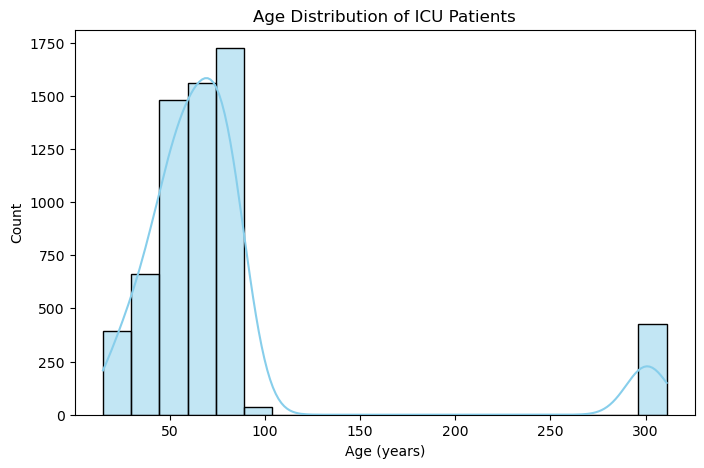

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(merged_data['AGE'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of ICU Patients')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

# Gender Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


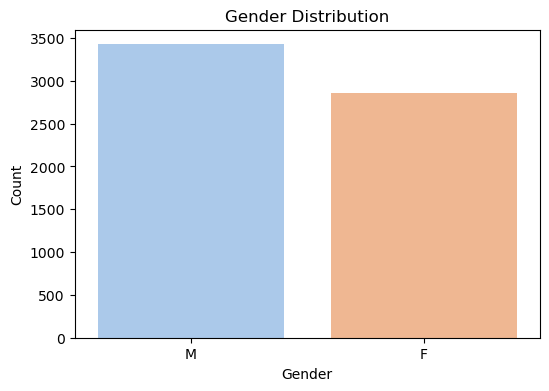

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=merged_data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Mortality

Mortality Rate: 15.70%


/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


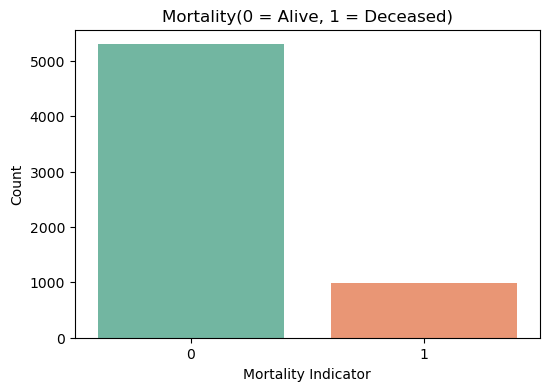

In [20]:
mortality_rate = merged_data['HOSPITAL_EXPIRE_FLAG'].mean() * 100
print(f"Mortality Rate: {mortality_rate:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='HOSPITAL_EXPIRE_FLAG', data=merged_data, palette='Set2')
plt.title('Mortality(0 = Alive, 1 = Deceased)')
plt.xlabel('Mortality Indicator')
plt.ylabel('Count')
plt.show()

In [21]:
# Calculate Mortality Rate
mortality_rate = merged_data['HOSPITAL_EXPIRE_FLAG'].mean() * 100
print(f"Mortality Rate: {mortality_rate:.2f}%")


Mortality Rate: 15.70%


# Ethicity Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


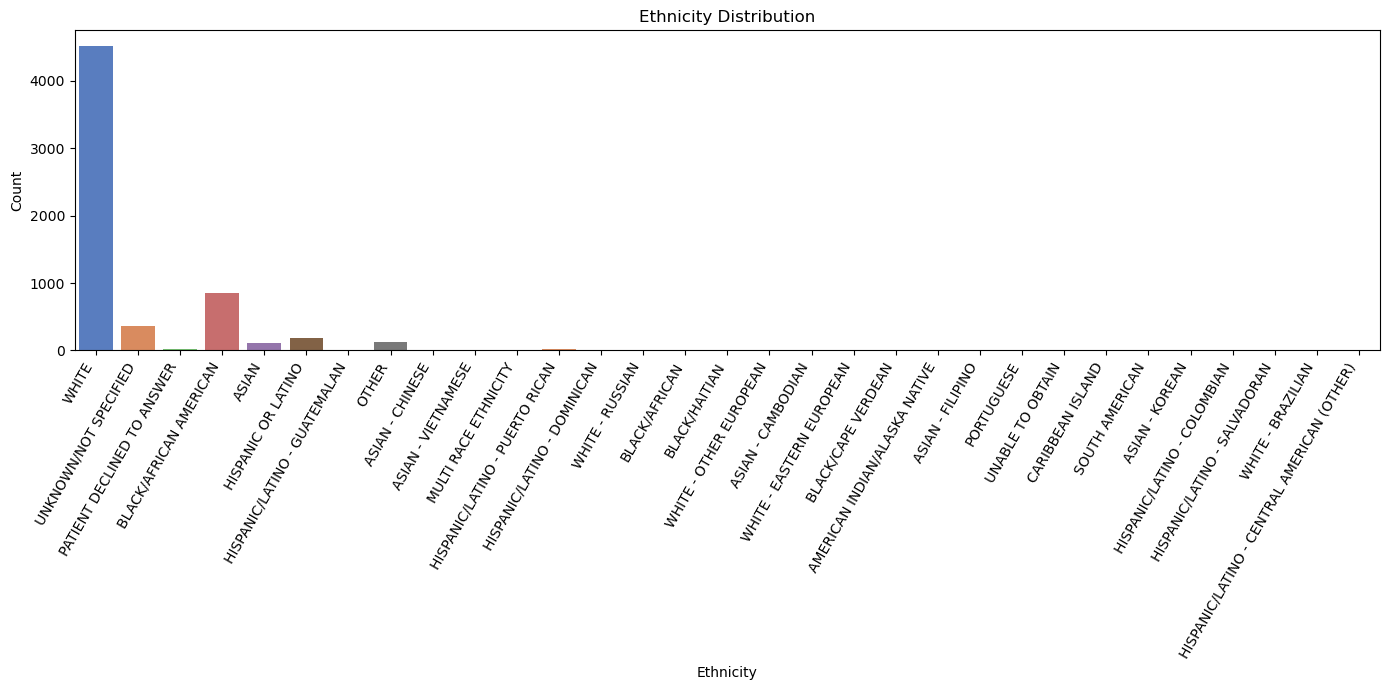

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))  # Increase figure width
sns.countplot(x='ETHNICITY', data=merged_data, palette='muted')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

plt.xticks(rotation=60, ha='right')  # Rotate labels more and right-align
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()


# Length of stay

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


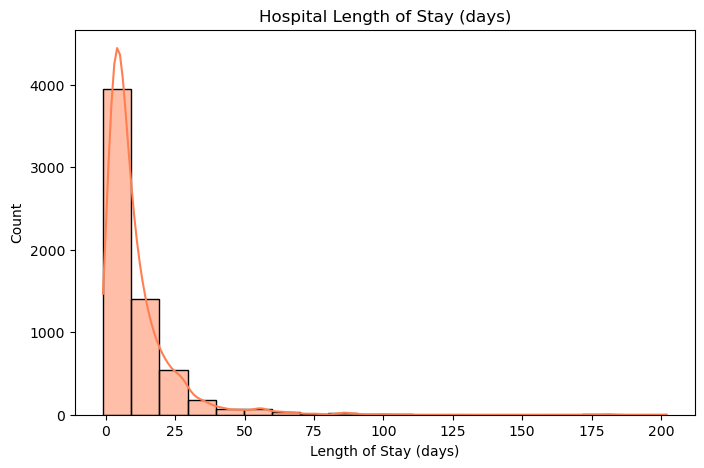

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['LOS_DAYS'], kde=True, bins=20, color='coral')
plt.title('Hospital Length of Stay (days)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.show()

# Admission Hour and Day of Week

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


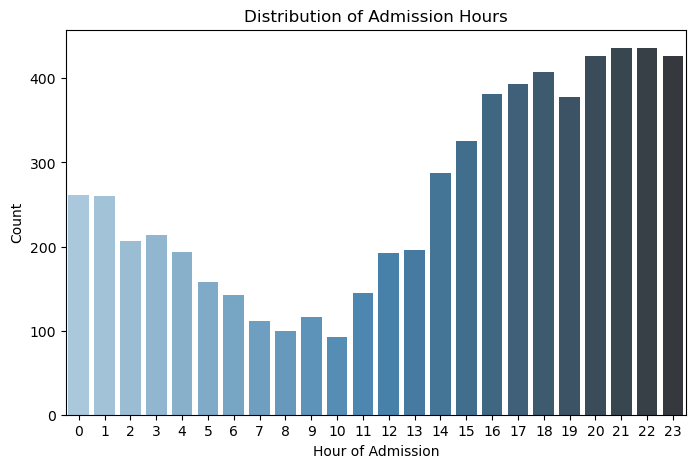

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


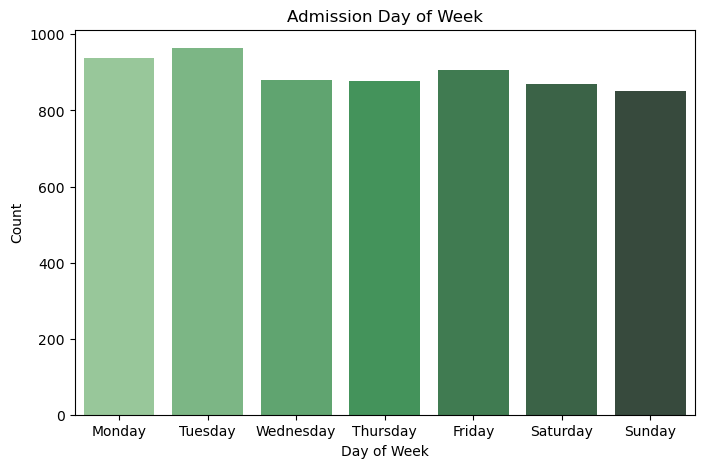

In [24]:
# Admission Hour Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ADMIT_HOUR', data=merged_data, palette='Blues_d')
plt.title('Distribution of Admission Hours')
plt.xlabel('Hour of Admission')
plt.ylabel('Count')
plt.show()

# Day of Week Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ADMIT_DAYOFWEEK', data=merged_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Greens_d')
plt.title('Admission Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap

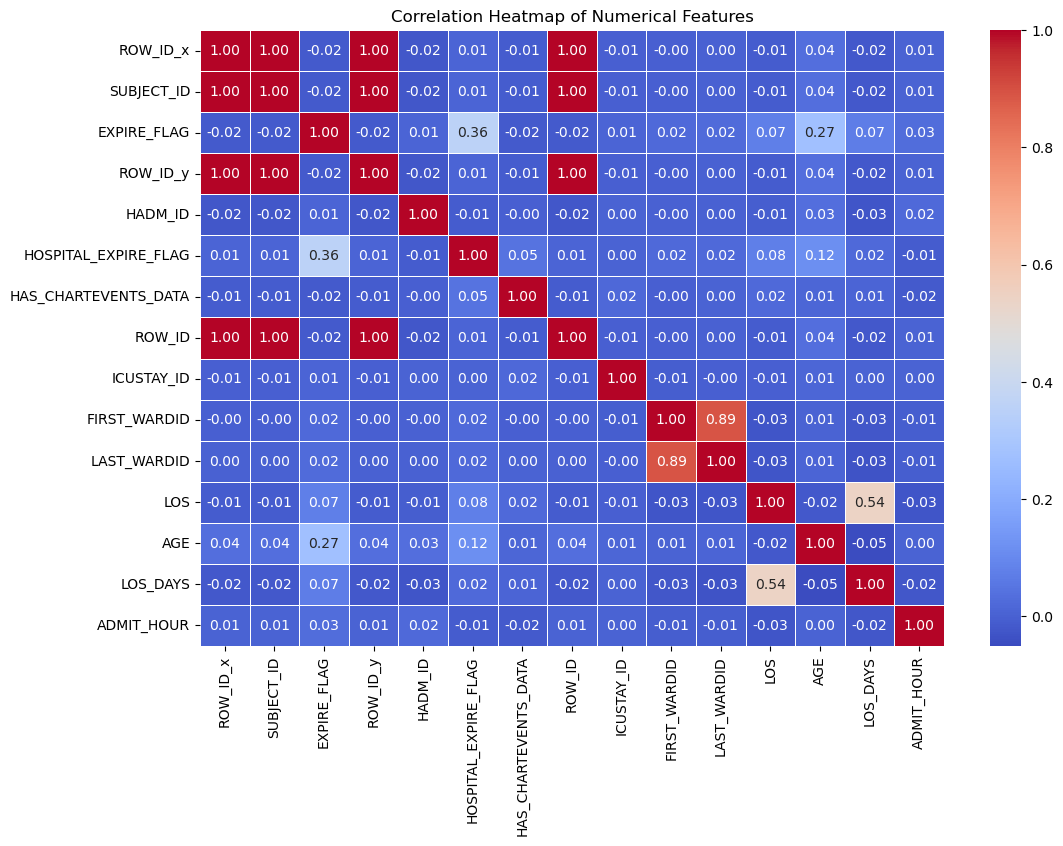

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = pd.read_csv("MERGED_DATA_cleaned_final.csv")
numerical_features = merged_data.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Scatter Plot: Age vs. Length of Stay

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

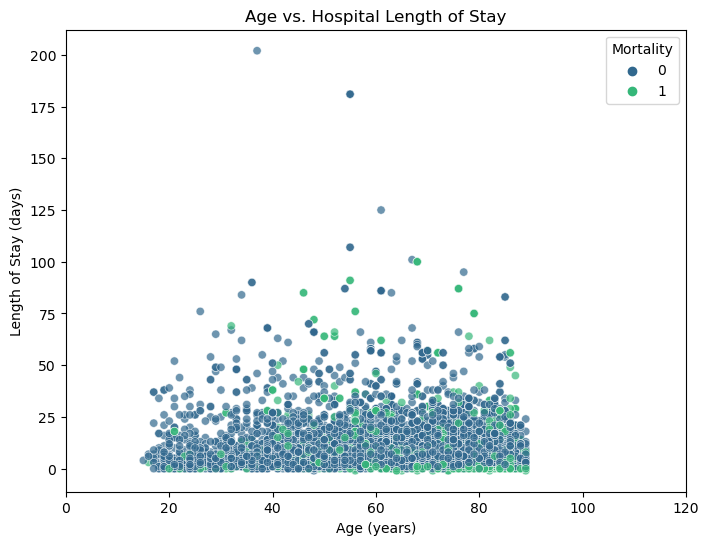

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Filter out unrealistic ages (keep only ages ≤ 150)
filtered_data = merged_data[merged_data['AGE'] <= 150]

sns.scatterplot(x='AGE', y='LOS_DAYS', hue='HOSPITAL_EXPIRE_FLAG', data=filtered_data, palette='viridis', alpha=0.7)
plt.title('Age vs. Hospital Length of Stay')
plt.xlabel('Age (years)')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Mortality')
plt.xlim(0, 120)
plt.show()

# Heart Rate Time series

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/56494986.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('CHARTEVENTS_cleaned_final.csv', parse_dates=['charttime', 'storetime'])


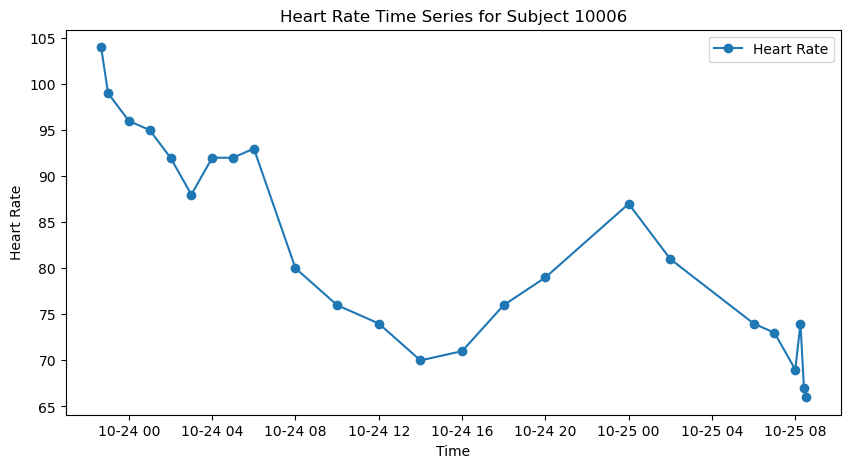

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chartevents = pd.read_csv('CHARTEVENTS_cleaned_final.csv', parse_dates=['charttime', 'storetime'])
sample_subject = 10006
heart_rate_itemid = 211

heart_rate_data = chartevents[
    (chartevents['subject_id'] == sample_subject) &
    (chartevents['itemid'] == heart_rate_itemid)
]


plt.figure(figsize=(10, 5))
plt.plot(heart_rate_data['charttime'], heart_rate_data['valuenum'], marker='o', linestyle='-', label='Heart Rate')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title(f'Heart Rate Time Series for Subject {sample_subject}')
plt.legend()
plt.show()

# Top 10 prescribed Drugs

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/1632054327.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version

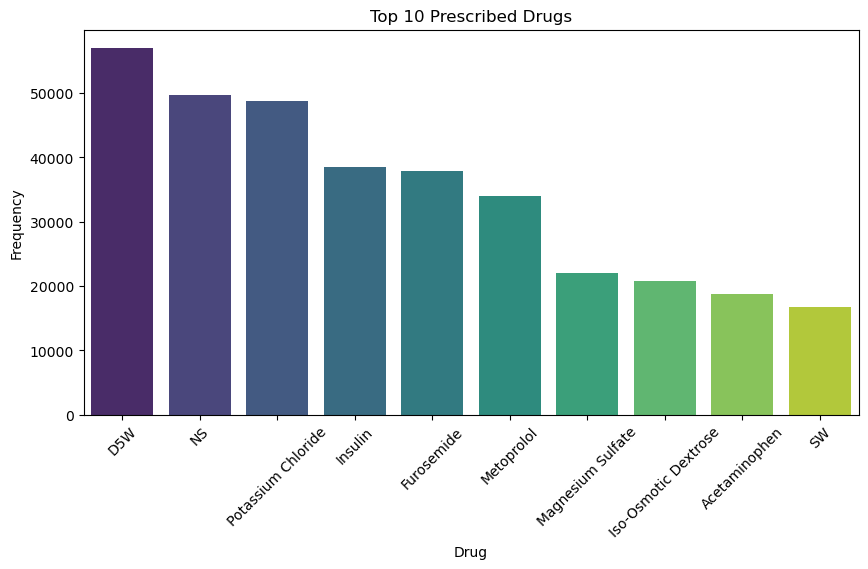

In [28]:
prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
drug_counts = prescriptions['DRUG'].value_counts().head(10) #frequency of prescribed drugs using the 'drug' column

plt.figure(figsize=(10, 5))
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette='viridis')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Top 10 Prescribed Drugs')
plt.xticks(rotation=45)
plt.show()

In [29]:
print(df.columns)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID',
       'VALUE', 'VALUEUOM', 'STORETIME', 'CGID', 'STOPPED', 'NEWBOTTLE',
       'ISERROR'],
      dtype='object')


# Identifying patients with sepsis

In [30]:
# Load the diagnoses ICD dataset
diagnoses = pd.read_csv("DIAGNOSES_ICD.csv")

# Make sure the ICD9_CODE column is of string type
diagnoses["ICD9_CODE"] = diagnoses["ICD9_CODE"].astype(str)

# Define a mask for sepsis-related ICD-9 codes.
# Adjust these codes based on your clinical criteria.
sepsis_mask = (
    diagnoses["ICD9_CODE"].str.startswith("99591") | 
    diagnoses["ICD9_CODE"].str.startswith("99592") | 
    diagnoses["ICD9_CODE"].str.startswith("78552") | 
    diagnoses["ICD9_CODE"].str.startswith("038")
)

# Filter the dataset for sepsis diagnoses
sepsis_diagnoses = diagnoses[sepsis_mask]

# Get unique patient IDs with any sepsis diagnosis
sepsis_patients = sepsis_diagnoses["SUBJECT_ID"].unique()

# Print the number of unique patients identified with sepsis
print("Number of unique patients with sepsis diagnosis:", len(sepsis_patients))

Number of unique patients with sepsis diagnosis: 1152


In [31]:
import pandas as pd

# Ensure that DEATHTIME and ADMITTIME are datetime objects.
merged_data['ADMITTIME'] = pd.to_datetime(merged_data['ADMITTIME'], errors='coerce')
merged_data['DEATHTIME'] = pd.to_datetime(merged_data['DEATHTIME'], errors='coerce')

# Create a new DataFrame with only those patients who died (i.e., DEATHTIME is not NaT).
# (If you replaced missing DEATHTIME with "Alive", you might need to adjust this filter.)
death_df = merged_data[merged_data['DEATHTIME'].notna()].copy()

# Calculate the time difference (in days) between admission and death.
death_df['time_to_death_days'] = (death_df['DEATHTIME'] - death_df['ADMITTIME']).dt.total_seconds() / (24 * 3600)

# Count the number of deaths within 1 day, 7 days, and 30 days.
deaths_within_day = (death_df['time_to_death_days'] <= 1).sum()
deaths_within_week = (death_df['time_to_death_days'] <= 7).sum()
deaths_within_month = (death_df['time_to_death_days'] <= 30).sum()

print("Number of patients who died within 1 day:", deaths_within_day)
print("Number of patients who died within 1 week:", deaths_within_week)
print("Number of patients who died within 1 month:", deaths_within_month)


Number of patients who died within 1 day: 151
Number of patients who died within 1 week: 500
Number of patients who died within 1 month: 909


/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/1306235398.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['DEATHTIME'] = pd.to_datetime(merged_data['DEATHTIME'], errors='coerce')


In [32]:
import pandas as pd
import numpy as np

# Load your cleaned merged dataset
merged_data = pd.read_csv("MERGED_DATA_cleaned_final.csv", parse_dates=["ADMITTIME", "DISCHTIME", "DOB", "DEATHTIME"])

# Convert DEATHTIME to datetime (if not already) and handle errors
merged_data['DEATHTIME'] = pd.to_datetime(merged_data['DEATHTIME'], errors='coerce')

# Calculate time (in days) from admission to death (only for those who died)
merged_data['time_to_death_days'] = (merged_data['DEATHTIME'] - merged_data['ADMITTIME']).dt.total_seconds() / (24 * 3600)

# Filter patients who died (DEATHTIME not missing) within 30 days (i.e., within a month)
deaths_within_month = merged_data[(merged_data['DEATHTIME'].notna()) & (merged_data['time_to_death_days'] <= 30)]

print("Total number of patients who died within a month:", deaths_within_month.shape[0])

# Descriptive statistics for numerical variables (e.g., age, length of stay)
print("\nDescriptive statistics for patients who died within a month:")
print(deaths_within_month[['AGE', 'LOS_DAYS', 'time_to_death_days']].describe())

# Frequency distributions for key categorical variables:
categorical_vars = ['GENDER', 'ETHNICITY', 'ADMISSION_TYPE', 'DIAGNOSIS']

for var in categorical_vars:
    if var in deaths_within_month.columns:
        print(f"\nValue counts for {var}:")
        print(deaths_within_month[var].value_counts(dropna=False))

# Optionally, you might want to look at other variables available in your data.
# For example, distribution of marital status or insurance type:
other_vars = ['MARITAL_STATUS', 'INSURANCE']
for var in other_vars:
    if var in deaths_within_month.columns:
        print(f"\nValue counts for {var}:")
        print(deaths_within_month[var].value_counts(dropna=False))

Total number of patients who died within a month: 909

Descriptive statistics for patients who died within a month:
              AGE    LOS_DAYS  time_to_death_days
count  909.000000  909.000000          909.000000
mean    96.815182    7.951595            8.423802
std     78.199683    7.897601            8.011878
min     16.000000   -1.000000          -28.077778
25%     59.000000    1.000000            1.813194
50%     75.000000    6.000000            6.150694
75%     84.000000   12.000000           12.829861
max    311.000000   29.000000           29.965972

Value counts for GENDER:
GENDER
M    458
F    451
Name: count, dtype: int64

Value counts for ETHNICITY:
ETHNICITY
WHITE                         674
BLACK/AFRICAN AMERICAN         95
UNKNOWN/NOT SPECIFIED          81
ASIAN                          20
HISPANIC OR LATINO             18
OTHER                          13
PATIENT DECLINED TO ANSWER      2
BLACK/CAPE VERDEAN              2
ASIAN - CAMBODIAN               1
UNABLE TO OB

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3468434200.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data = pd.read_csv("MERGED_DATA_cleaned_final.csv", parse_dates=["ADMITTIME", "DISCHTIME", "DOB", "DEATHTIME"])
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3468434200.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['DEATHTIME'] = pd.to_datetime(merged_data['DEATHTIME'], errors='coerce')


In [33]:
import pandas as pd
import numpy as np

# Load the cleaned merged dataset with datetime columns
merged_data = pd.read_csv("MERGED_DATA_cleaned_final.csv", parse_dates=["ADMITTIME", "DISCHTIME", "DOB", "DEATHTIME"])

# Ensure DEATHTIME is datetime (if not already)
merged_data['DEATHTIME'] = pd.to_datetime(merged_data['DEATHTIME'], errors='coerce')

# Calculate time-to-death (in days) for those who died
merged_data['time_to_death_days'] = (merged_data['DEATHTIME'] - merged_data['ADMITTIME']).dt.total_seconds() / (24 * 3600)

# Identify sepsis patients.
# (Adjust the column and keyword/ICD codes as needed.)
# Here, we assume that the diagnosis column contains "sepsis" when present.
sepsis_patients = merged_data[merged_data['DIAGNOSIS'].str.contains("sepsis", case=False, na=False)]

print("Total sepsis patients:", sepsis_patients.shape[0])

# Group A: Sepsis patients who died within 30 days
sepsis_death = sepsis_patients[
    (sepsis_patients['DEATHTIME'].notna()) &
    (merged_data['time_to_death_days'] <= 30)
]
print("Sepsis patients who died within 30 days:", sepsis_death.shape[0])

# Group B: Sepsis patients who did NOT die within 30 days
sepsis_survived = sepsis_patients[~(
    (sepsis_patients['DEATHTIME'].notna()) &
    (merged_data['time_to_death_days'] <= 30)
)]
print("Sepsis patients who survived beyond 30 days or are alive:", sepsis_survived.shape[0])

# Now, let’s look at several characteristics.
# For numerical variables, compute descriptive statistics.
num_vars = ['AGE', 'LOS_DAYS', 'time_to_death_days']
print("\n--- Descriptive Statistics for Sepsis Patients Who Died Within 30 Days ---")
print(sepsis_death[num_vars].describe())

print("\n--- Descriptive Statistics for Sepsis Patients Who Did Not Die Within 30 Days ---")
print(sepsis_survived[num_vars].describe())

# For categorical variables, check frequency distributions.
cat_vars = ['GENDER', 'ETHNICITY', 'ADMISSION_TYPE', 'MARITAL_STATUS', 'INSURANCE']
print("\n--- Frequency Distributions for Sepsis Patients Who Died Within 30 Days ---")
for var in cat_vars:
    if var in sepsis_death.columns:
        print(f"\n{var}:")
        print(sepsis_death[var].value_counts(dropna=False))

print("\n--- Frequency Distributions for Sepsis Patients Who Did Not Die Within 30 Days ---")
for var in cat_vars:
    if var in sepsis_survived.columns:
        print(f"\n{var}:")
        print(sepsis_survived[var].value_counts(dropna=False))

# You could also compare other available clinical variables such as procedures, medications,
# comorbid conditions (if available), etc.


Total sepsis patients: 405
Sepsis patients who died within 30 days: 89
Sepsis patients who survived beyond 30 days or are alive: 316

--- Descriptive Statistics for Sepsis Patients Who Died Within 30 Days ---
              AGE   LOS_DAYS  time_to_death_days
count   89.000000  89.000000           89.000000
mean    98.348315   6.112360            6.611064
std     81.243196   6.747791            6.740915
min     31.000000   0.000000            0.140278
25%     58.000000   1.000000            1.064583
50%     72.000000   3.000000            3.862500
75%     82.000000  11.000000           11.436806
max    306.000000  29.000000           29.793750

--- Descriptive Statistics for Sepsis Patients Who Did Not Die Within 30 Days ---
              AGE    LOS_DAYS  time_to_death_days
count  316.000000  316.000000           11.000000
mean    78.395570   14.044304           61.431061
std     56.814081   16.307889           18.369409
min     22.000000    0.000000           34.606944
25%     53.000000

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/893950803.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data = pd.read_csv("MERGED_DATA_cleaned_final.csv", parse_dates=["ADMITTIME", "DISCHTIME", "DOB", "DEATHTIME"])
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/893950803.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['DEATHTIME'] = pd.to_datetime(merged_data['DEATHTIME'], errors='coerce')
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/893950803.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sepsis_death = sepsis_patients[
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/89395

### Feature Engineering

In [34]:
merged = pd.merge(admissions, patients, on="SUBJECT_ID", how="inner")

In [35]:
# Check shape of original data
print("PATIENTS:", patients.shape)
print("ADMISSIONS:", admissions.shape)

# After converting dates
print("Missing DOBs:", patients["DOB"].isna().sum())
print("Missing ADMITTIME:", admissions["ADMITTIME"].isna().sum())

# Merge without filtering to test what’s left
merged_raw = pd.merge(admissions, patients, on="SUBJECT_ID", how="inner")
print("Merged rows BEFORE filtering:", merged_raw.shape)

# Now filter
merged_filtered = merged_raw[
    (merged_raw["DOB"].dt.year >= 1900) & (merged_raw["DOB"].dt.year <= 2024) &
    (merged_raw["ADMITTIME"].dt.year >= 2000) & (merged_raw["ADMITTIME"].dt.year <= 2024)
]
print("Merged rows AFTER filtering:", merged_filtered.shape)

# Show a few rows if available
print(merged_filtered[["SUBJECT_ID", "DOB", "ADMITTIME"]].head())


PATIENTS: (10000, 8)
ADMISSIONS: (5932, 19)
Missing DOBs: 0
Missing ADMITTIME: 0
Merged rows BEFORE filtering: (5932, 26)
Merged rows AFTER filtering: (0, 26)
Empty DataFrame
Columns: [SUBJECT_ID, DOB, ADMITTIME]
Index: []


In [36]:
(merged_raw["DOB"].dt.year >= 1900) & (merged_raw["DOB"].dt.year <= 2024)&(merged_raw["ADMITTIME"].dt.year >= 2000) & (merged_raw["ADMITTIME"].dt.year <= 2024)


0       False
1       False
2       False
3       False
4       False
        ...  
5927    False
5928    False
5929    False
5930    False
5931    False
Length: 5932, dtype: bool

In [37]:
import pandas as pd
import numpy as np

# Load data
patients = pd.read_csv("patients.csv")
admissions = pd.read_csv("admissions.csv")

# Convert dates
patients["DOB"] = pd.to_datetime(patients["DOB"], errors="coerce")
admissions["ADMITTIME"] = pd.to_datetime(admissions["ADMITTIME"], errors="coerce")

# Merge without filtering
merged = pd.merge(admissions, patients, on="SUBJECT_ID", how="inner")

# NEW: Filter only clearly invalid DOBs
merged = merged[(merged["DOB"].dt.year >= 1900) & (merged["DOB"].dt.year <= 2150)]
merged = merged[(merged["ADMITTIME"].dt.year >= 2000) & (merged["ADMITTIME"].dt.year <= 2250)]

# Calculate AGE
merged["AGE"] = merged["ADMITTIME"].dt.year - merged["DOB"].dt.year

# Drop invalid ages
merged.loc[(merged["AGE"] < 0) | (merged["AGE"] > 120), "AGE"] = np.nan
merged["AGE"].fillna(merged["AGE"].median(), inplace=True)

# Show results
print(merged[["SUBJECT_ID", "AGE"]].describe())
print("Number of missing AGE values:", merged["AGE"].isna().sum())


         SUBJECT_ID           AGE
count  10773.000000  10773.000000
mean    5260.868375     54.885362
std     3053.813067     25.684873
min        2.000000      0.000000
25%     2610.000000     45.000000
50%     5261.000000     61.000000
75%     7862.000000     75.000000
max    10566.000000     89.000000
Number of missing AGE values: 0


In [38]:
# Rebuild base data
data = admissions.merge(patients, on="SUBJECT_ID", how="outer")
data = data.merge(icustays, on=["SUBJECT_ID", "HADM_ID"], how="outer")

# THEN merge in AGE
data = data.merge(merged[["SUBJECT_ID", "HADM_ID", "AGE"]], on=["SUBJECT_ID", "HADM_ID"], how="left")

In [39]:
def age_group(age):
    if age < 18:
        return "Child"
    elif age < 40:
        return "Young Adult"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

merged["AGE_GROUP"] = merged["AGE"].apply(age_group)


In [40]:
data = data.merge(merged[["SUBJECT_ID", "HADM_ID", "AGE"]], on=["SUBJECT_ID", "HADM_ID"], how="left")

In [41]:
print(data.columns)

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'ROW_ID',
       'ICUSTAY_ID', 'DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT',
       'FIRST_WARDID', 'LAST_WARDID', 'INTIME', 'OUTTIME', 'LOS', 'AGE_x',
       'AGE_y'],
      dtype='object')


In [42]:
# Only keep necessary columns to avoid duplicates
age_df = merged[["SUBJECT_ID", "HADM_ID", "AGE"]].drop_duplicates()

# Merge AGE into your main data
data = data.merge(age_df, on=["SUBJECT_ID", "HADM_ID"], how="left")


In [43]:
print("AGE in data now?", "AGE" in data.columns)
print(data[["AGE"]].describe())


AGE in data now? True
                AGE
count  11504.000000
mean      55.386474
std       25.381899
min        0.000000
25%       46.000000
50%       61.000000
75%       75.000000
max       89.000000


In [44]:
def age_bucket(age):
    if age < 18:
        return "Child"
    elif age < 40:
        return "Young Adult"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

data["AGE_GROUP"] = data["AGE"].apply(age_bucket)

In [45]:
# Make sure INTIME and OUTTIME are in datetime
icustays["INTIME"] = pd.to_datetime(icustays["INTIME"], errors="coerce")
icustays["OUTTIME"] = pd.to_datetime(icustays["OUTTIME"], errors="coerce")

# Calculate ICU_LOS in days
icustays["ICU_LOS"] = (icustays["OUTTIME"] - icustays["INTIME"]).dt.total_seconds() / (60 * 60 * 24)

# Clip ICU_LOS to reasonable max
icustays["ICU_LOS"] = icustays["ICU_LOS"].clip(lower=0, upper=60)


In [46]:
data = data.merge(icustays[["SUBJECT_ID", "HADM_ID", "ICU_LOS"]], on=["SUBJECT_ID", "HADM_ID"], how="left")

In [47]:
def stay_bucket(los):
    if los < 2:
        return "Short"
    elif los < 7:
        return "Medium"
    else:
        return "Long"

data["ICU_STAY_TYPE"] = data["ICU_LOS"].apply(stay_bucket)
print(data[["ICU_LOS", "ICU_STAY_TYPE"]].head())

    ICU_LOS ICU_STAY_TYPE
0  0.091829         Short
1  6.064560        Medium
2  1.678472         Short
3  0.084444         Short
4  3.672917        Medium


In [48]:
data["MORTALITY"] = data["DEATHTIME"].notna().astype(int)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#### Age vs ICU Stay Length

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


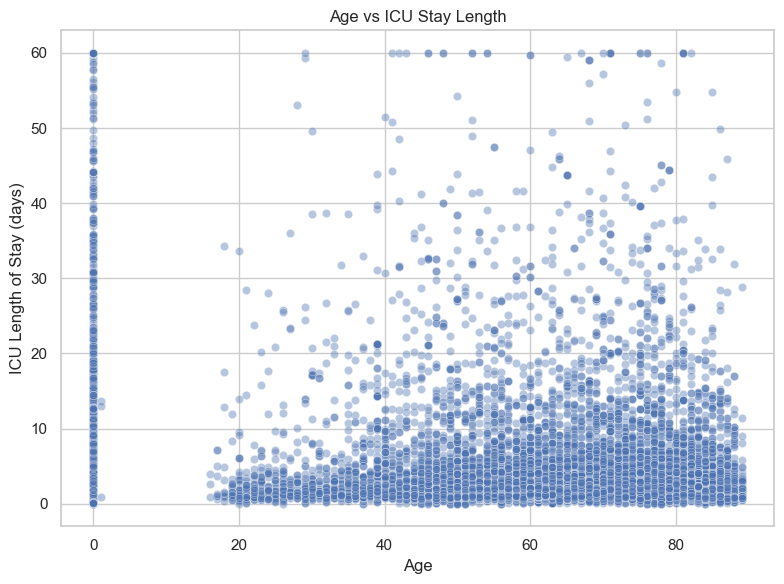

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="AGE", y="ICU_LOS", alpha=0.4)
plt.title("Age vs ICU Stay Length")
plt.xlabel("Age")
plt.ylabel("ICU Length of Stay (days)")
plt.tight_layout()
plt.show()

#### ICU Stay Length vs Mortality

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


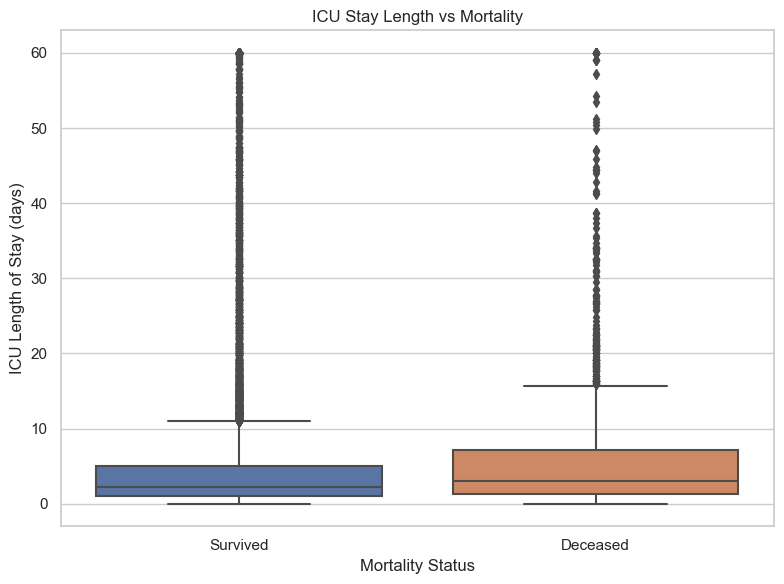

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="MORTALITY", y="ICU_LOS", data=data)
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.title("ICU Stay Length vs Mortality")
plt.xlabel("Mortality Status")
plt.ylabel("ICU Length of Stay (days)")
plt.tight_layout()
plt.show()

#### Mortality rate vs Age Group

In [52]:
def age_bucket(age):
    if age < 18:
        return "Child"
    elif age < 40:
        return "Young Adult"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

data["AGE_GROUP"] = data["AGE"].apply(age_bucket)

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


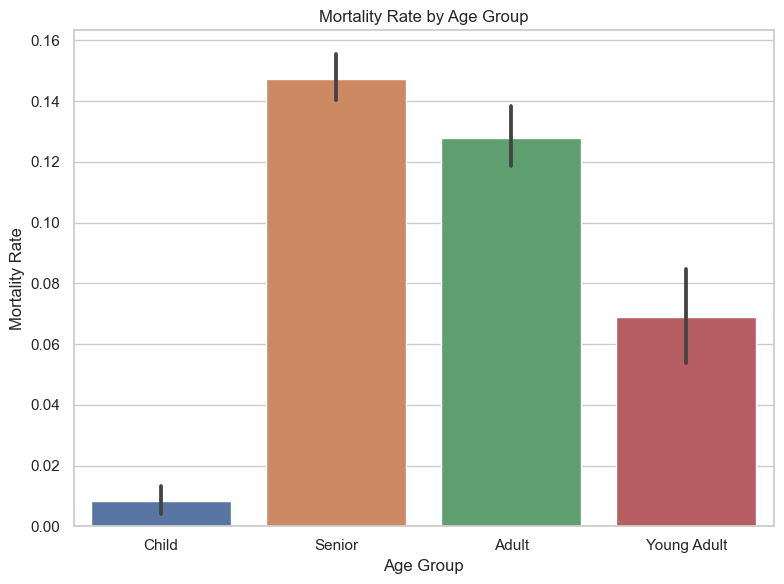

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x="AGE_GROUP", y="MORTALITY")
plt.title("Mortality Rate by Age Group")
plt.ylabel("Mortality Rate")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


#### Mortality Rate vs Gender and Ethnicity

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

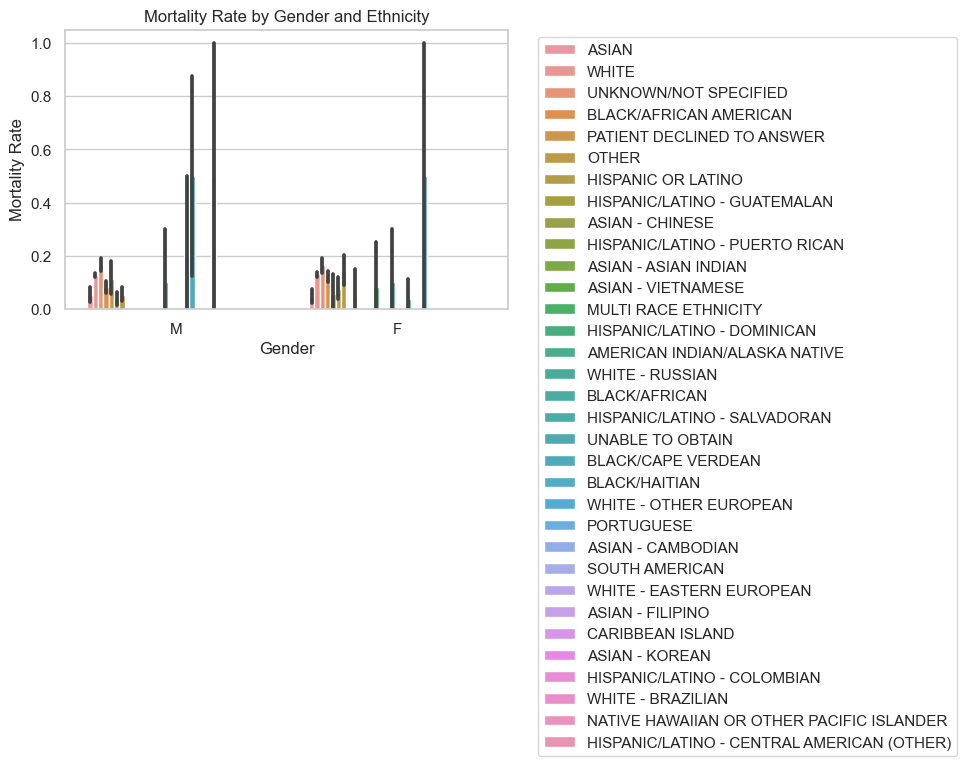

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="GENDER", y="MORTALITY", hue="ETHNICITY")
plt.title("Mortality Rate by Gender and Ethnicity")
plt.ylabel("Mortality Rate")
plt.xlabel("Gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Mortality Rate vs ICU Unit

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


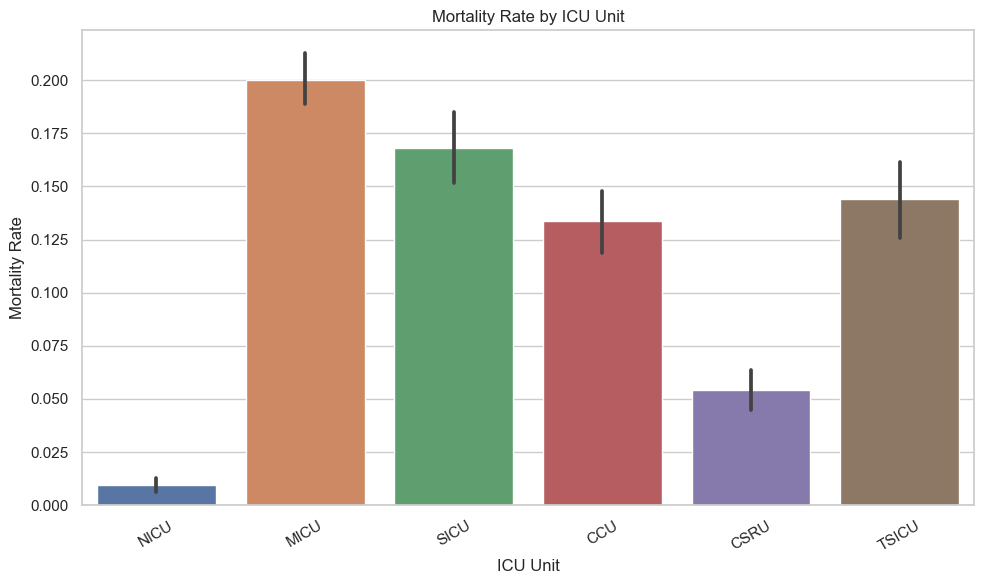

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="FIRST_CAREUNIT", y="MORTALITY")
plt.title("Mortality Rate by ICU Unit")
plt.xlabel("ICU Unit")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Predicting patient deterioration

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV

In [57]:
df = pd.read_csv("MERGED_DATA_cleaned_final.csv", parse_dates=["ADMITTIME", "DISCHTIME", "DOB"])

In [58]:
df['AGE'] = df['ADMITTIME'].dt.year - df['DOB'].dt.year
df['LOS_DAYS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.days
df['ADMIT_HOUR'] = df['ADMITTIME'].dt.hour

# Define your feature set and target based solely on your dataset columns.
# (For example, using AGE, LOS_DAYS, and ADMIT_HOUR)
features = df[['AGE', 'LOS_DAYS', 'ADMIT_HOUR']].copy()
features = features.fillna(features.median())
target = df['HOSPITAL_EXPIRE_FLAG']  # Proxy for patient deterioration

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features for models that require scaling (e.g., Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Then scale the SMOTE data for Logistic Regression (if used)
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [61]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = log_reg.predict(X_test_scaled)

In [62]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

In [63]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                            random_state=42, scale_pos_weight=scale_pos_weight)
xgb_clf.fit(X_train, y_train)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_clf.predict(X_test)

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

In [64]:
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    roc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", roc, "\n")
    return roc

roc_lr = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
roc_rf = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
roc_xgb = evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1077
           1       0.19      0.24      0.21       181

    accuracy                           0.75      1258
   macro avg       0.53      0.54      0.53      1258
weighted avg       0.77      0.75      0.76      1258

Confusion Matrix:
[[897 180]
 [138  43]]
ROC-AUC Score: 0.5821444877062846 

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1077
           1       0.57      0.40      0.47       181

    accuracy                           0.87      1258
   macro avg       0.74      0.67      0.70      1258
weighted avg       0.86      0.87      0.86      1258

Confusion Matrix:
[[1023   54]
 [ 109   72]]
ROC-AUC Score: 0.7122814037355659 

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1077
           1 

In [65]:
from sklearn.metrics import precision_recall_curve

# Using Random Forest as an example
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_rf)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold based on F1:", optimal_threshold)

# You can experiment with a lower threshold
custom_threshold = 0.3  # For example, lowering the threshold
y_pred_custom = (y_prob_rf >= custom_threshold).astype(int)
print("\nClassification Report (Threshold = 0.45):")
print(classification_report(y_test, y_pred_custom))


Optimal threshold based on F1: 0.59

Classification Report (Threshold = 0.45):
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1077
           1       0.40      0.48      0.43       181

    accuracy                           0.82      1258
   macro avg       0.65      0.68      0.66      1258
weighted avg       0.84      0.82      0.83      1258



In [66]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                         param_grid_rf, 
                         cv=5, 
                         scoring='roc_auc', 
                         n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters (RF):", grid_rf.best_params_)
print("Best ROC-AUC (RF):", grid_rf.best_score_)

# Use the best estimator for predictions
rf_best = grid_rf.best_estimator_
y_prob_rf_best = rf_best.predict_proba(X_test)[:, 1]
roc_rf_best = roc_auc_score(y_test, y_prob_rf_best)
print("Tuned Random Forest ROC-AUC:", roc_rf_best)


Best parameters (RF): {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC-AUC (RF): 0.6977372169326921
Tuned Random Forest ROC-AUC: 0.715967209919102


In [67]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Set up a 10-fold cross-validation strategy
cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the GridSearchCV object using RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=cv_strategy,
                           scoring='roc_auc',  # you can change this if needed
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding cross-validation ROC-AUC score
print("Best parameters from 10-fold CV:", grid_search.best_params_)
print("Best cross-validation ROC-AUC score:", grid_search.best_score_)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best parameters from 10-fold CV: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation ROC-AUC score: 0.7102320774664735


In [68]:
# Model Selection

model_scores = {
    "Logistic Regression": roc_lr,
    "Random Forest": roc_rf,
    "XGBoost": roc_xgb
}
best_model_name = max(model_scores, key=model_scores.get)
print("Best model based on ROC-AUC:", best_model_name)

# Select the best model and corresponding test set representation
if best_model_name == "Logistic Regression":
    best_model = log_reg
    # Logistic Regression used scaled features
    X_test_best = X_test_scaled
    y_prob_best = y_prob_lr
elif best_model_name == "Random Forest":
    best_model = rf
    X_test_best = X_test  # Random Forest uses unscaled features
    y_prob_best = y_prob_rf
else:  # XGBoost
    best_model = xgb_clf
    X_test_best = X_test
    y_prob_best = y_prob_xgb

# Optionally, print the ROC-AUC of the best model:
best_roc_auc = model_scores[best_model_name]
print(f"{best_model_name} ROC-AUC Score: {best_roc_auc:.3f}")

Best model based on ROC-AUC: Random Forest
Random Forest ROC-AUC Score: 0.712


In [69]:
# Calibration of the Best Model
calibrated_model = CalibratedClassifierCV(best_model, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)
y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]
roc_calibrated = roc_auc_score(y_test, y_prob_calibrated)
print("Calibrated ROC-AUC:", roc_calibrated)

Calibrated ROC-AUC: 0.7155132170906499


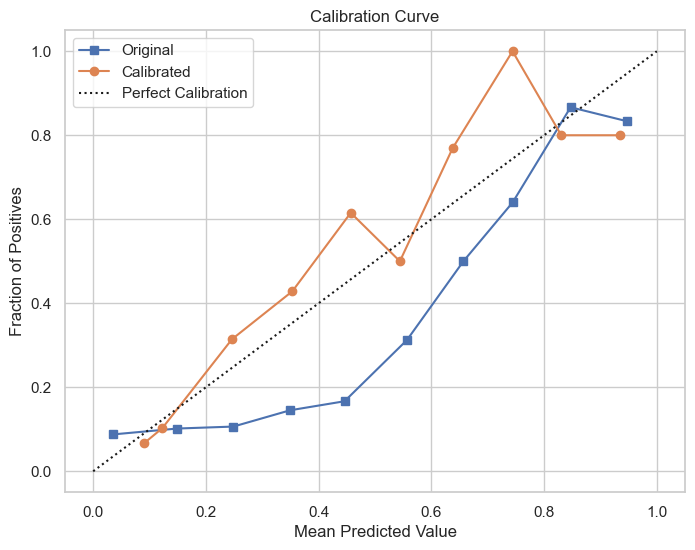

In [70]:
# Plot calibration curves (original vs. calibrated)
fraction_pos_orig, mean_pred_orig = calibration_curve(y_test, y_prob_best, n_bins=10)
fraction_pos_cal, mean_pred_cal = calibration_curve(y_test, y_prob_calibrated, n_bins=10)
plt.figure(figsize=(8,6))
plt.plot(mean_pred_orig, fraction_pos_orig, "s-", label="Original")
plt.plot(mean_pred_cal, fraction_pos_cal, "o-", label="Calibrated")
plt.plot([0,1], [0,1], "k:", label="Perfect Calibration")
plt.xlabel("Mean Predicted Value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

# Use the calibrated probabilities for final risk scores
y_prob_final = y_prob_calibrated

In [71]:
def risk_category_quantile(risk_score):
    if risk_score >= q90:
        return "High Risk"
    elif risk_score >= q50:
        return "Moderate Risk"
    else:
        return "Low Risk"

In [72]:
# Define treatment recommendations accordingly:
def recommendation_from_category(risk_category):
    if risk_category == "High Risk":
        return "High risk: Immediate ICU review and aggressive intervention is recommended."
    elif risk_category == "Moderate Risk":
        return "Moderate risk: Enhanced monitoring is advised; review labs, vitals, and medical history frequently."
    else:
        return "Low risk: Standard care protocol with routine monitoring."

In [73]:
results_df = X_test.copy()  # Make a copy of your test features
results_df['True Outcome'] = y_test.values
results_df['Risk Score'] = y_prob_best  # or whichever risk score you're using
results_df = results_df.reset_index(drop=True)

In [74]:
q50 = results_df['Risk Score'].quantile(0.50)
q90 = results_df['Risk Score'].quantile(0.90)
print("Risk Score Quantiles:")
print("50th Percentile:", q50)
print("90th Percentile:", q90)

Risk Score Quantiles:
50th Percentile: 0.07
90th Percentile: 0.4953396097058365


In [75]:
results_df['Adjusted Risk Category'] = results_df['Risk Score'].apply(risk_category_quantile)

In [76]:
results_df['Adjusted Treatment Recommendation'] = results_df['Adjusted Risk Category'].apply(recommendation_from_category)

# Display a sample of the adjusted predictions
print("\nSample Adjusted Predictions with Recommendations:")
print(results_df[['Risk Score', 'Adjusted Risk Category', 'Adjusted Treatment Recommendation']].head(70))


Sample Adjusted Predictions with Recommendations:
    Risk Score Adjusted Risk Category  \
0     0.164811          Moderate Risk   
1     0.060000               Low Risk   
2     0.310974          Moderate Risk   
3     0.050000               Low Risk   
4     0.050000               Low Risk   
..         ...                    ...   
65    0.028189               Low Risk   
66    0.020000               Low Risk   
67    0.030000               Low Risk   
68    0.030000               Low Risk   
69    0.010000               Low Risk   

                    Adjusted Treatment Recommendation  
0   Moderate risk: Enhanced monitoring is advised;...  
1   Low risk: Standard care protocol with routine ...  
2   Moderate risk: Enhanced monitoring is advised;...  
3   Low risk: Standard care protocol with routine ...  
4   Low risk: Standard care protocol with routine ...  
..                                                ...  
65  Low risk: Standard care protocol with routine ...  
66  Low 

In [77]:
y_pred_final = (y_prob_best >= 0.5).astype(int)
print("\nClassification Report (Threshold = 0.5):")
print(classification_report(y_test, y_pred_final))


Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1077
           1       0.57      0.40      0.47       181

    accuracy                           0.87      1258
   macro avg       0.74      0.67      0.70      1258
weighted avg       0.86      0.87      0.86      1258



In [78]:
# Assume y_prob_final (and hence risk categories) were computed for the test set.
X_mc = X_test.copy()  # Use the test set features
# Create a DataFrame for risk scores from the test set:
results_df = pd.DataFrame({'Risk Score': y_prob_final})
# Create risk categories using quantile-based binning (or your custom thresholds)
results_df['Risk Category'] = pd.qcut(results_df['Risk Score'], q=3, 
                                      labels=["Low Risk", "Moderate Risk", "High Risk"])
y_mc = results_df['Risk Category']

# Now split the test set further if needed (e.g., for evaluation)
from sklearn.model_selection import train_test_split
X_train_mc, X_val_mc, y_train_mc, y_val_mc = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)


In [79]:
# Suppose your full dataset is in a DataFrame called df.
# Make sure to apply the same preprocessing (e.g., scaling) that you did during training.
X_full = df[['AGE', 'LOS_DAYS', 'ADMIT_HOUR']].copy()

# If your model was trained on scaled features, transform X_full using the same scaler:
X_full_scaled = scaler.transform(X_full)

# Now predict the risk scores (probability of deterioration)
y_prob_full = best_model.predict_proba(X_full_scaled)[:, 1]

# Create a DataFrame with the full risk scores:
full_results_df = pd.DataFrame({'Risk Score': y_prob_full})
print(full_results_df.head())


   Risk Score
0        0.11
1        0.27
2        0.27
3        0.28
4        0.27


/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Classifying Patients into risk levels

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

In [81]:
df = pd.read_csv("MERGED_DATA_cleaned_final.csv", 
                 parse_dates=["ADMITTIME", "DISCHTIME", "DOB", "DEATHTIME"])

df['AGE'] = df['ADMITTIME'].dt.year - df['DOB'].dt.year
df['LOS_DAYS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.days
df['ADMIT_HOUR'] = df['ADMITTIME'].dt.hour

X_full = df[['AGE', 'LOS_DAYS', 'ADMIT_HOUR']].copy()
X_full = X_full.fillna(X_full.median())

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3275039829.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("MERGED_DATA_cleaned_final.csv",


In [82]:
 risk_scores = best_model.predict_proba(X_full)[:, 1] 

In [83]:
full_results_df['Risk Category'] = pd.qcut(full_results_df['Risk Score'], q=3, 
                                           labels=["Low Risk", "Moderate Risk", "High Risk"])
y_full = full_results_df['Risk Category']
print("Risk Category distribution:")
print(y_full.value_counts())

Risk Category distribution:
Risk Category
Moderate Risk    2763
Low Risk         2100
High Risk        1423
Name: count, dtype: int64


In [84]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

scaler_mc = StandardScaler()
X_train_mc_scaled = scaler_mc.fit_transform(X_train_mc)
X_test_mc_scaled = scaler_mc.transform(X_test_mc)

In [85]:
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_mc_scaled, y_train_mc)
y_pred_svm = svm_clf.predict(X_test_mc_scaled)
print("\n--- SVM Classifier Report ---")
print(classification_report(y_test_mc, y_pred_svm))


--- SVM Classifier Report ---
               precision    recall  f1-score   support

    High Risk       0.88      0.85      0.87       285
     Low Risk       0.99      0.98      0.98       420
Moderate Risk       0.91      0.94      0.92       553

     accuracy                           0.93      1258
    macro avg       0.93      0.92      0.92      1258
 weighted avg       0.93      0.93      0.93      1258



In [86]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_mc, y_train_mc)  # Decision trees work on unscaled data as well
y_pred_dt = dt_clf.predict(X_test_mc)
print("\n--- Decision Tree Classifier Report ---")
print(classification_report(y_test_mc, y_pred_dt))


--- Decision Tree Classifier Report ---
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00       285
     Low Risk       1.00      1.00      1.00       420
Moderate Risk       1.00      1.00      1.00       553

     accuracy                           1.00      1258
    macro avg       1.00      1.00      1.00      1258
 weighted avg       1.00      1.00      1.00      1258



In [87]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_mc_scaled, y_train_mc)
y_pred_knn = knn_clf.predict(X_test_mc_scaled)
print("\n--- k-NN Classifier Report ---")
print(classification_report(y_test_mc, y_pred_knn))


--- k-NN Classifier Report ---
               precision    recall  f1-score   support

    High Risk       0.95      0.92      0.93       285
     Low Risk       0.99      1.00      0.99       420
Moderate Risk       0.96      0.97      0.96       553

     accuracy                           0.97      1258
    macro avg       0.97      0.96      0.96      1258
 weighted avg       0.97      0.97      0.97      1258



In [88]:
rf_mc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mc.fit(X_train_mc, y_train_mc)
y_pred_rf_mc = rf_mc.predict(X_test_mc)
print("\n--- Random Forest (Multi-Class) Classifier Report ---")
print(classification_report(y_test_mc, y_pred_rf_mc))


--- Random Forest (Multi-Class) Classifier Report ---
               precision    recall  f1-score   support

    High Risk       0.98      1.00      0.99       285
     Low Risk       1.00      1.00      1.00       420
Moderate Risk       1.00      0.99      1.00       553

     accuracy                           1.00      1258
    macro avg       0.99      1.00      1.00      1258
 weighted avg       1.00      1.00      1.00      1258



In [89]:
df = pd.read_csv("MERGED_DATA_cleaned_final.csv", 
                 parse_dates=["ADMITTIME", "DISCHTIME", "DOB", "DEATHTIME"])

df['AGE'] = df['ADMITTIME'].dt.year - df['DOB'].dt.year
df['LOS_DAYS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.days
df['ADMIT_HOUR'] = df['ADMITTIME'].dt.hour

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_13593/3063645539.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("MERGED_DATA_cleaned_final.csv",


In [90]:
features = df[['AGE', 'LOS_DAYS', 'ADMIT_HOUR', 'GENDER', 'ETHNICITY', 
               'ADMISSION_TYPE', 'MARITAL_STATUS', 'INSURANCE']].copy()

categorical_cols = ['GENDER', 'ETHNICITY', 'ADMISSION_TYPE', 'MARITAL_STATUS', 'INSURANCE']
for col in categorical_cols:
    features[col] = features[col].fillna("Unknown")

# Define which columns are numeric and which are categorical
num_cols = ['AGE', 'LOS_DAYS', 'ADMIT_HOUR']
cat_cols = categorical_cols

# Create a preprocessing pipeline: scale numerical features and one-hot encode categorical ones.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [91]:
# Build the full pipeline (here it only does preprocessing)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Transform the features into a numeric matrix
X_features = pipeline.fit_transform(features)

# --- Use k-NN to find similar patients ---
# Set the number of neighbors (including the query patient itself)
n_neighbors = 6  # e.g., the nearest neighbor will be the patient itself
knn_model = NearestNeighbors(n_neighbors=n_neighbors)
knn_model.fit(X_features)

# Select a sample patient (for example, the first patient in the dataset)
sample_index = 0  
distances, indices = knn_model.kneighbors(X_features[sample_index])

print("Nearest neighbors for patient index", sample_index)
print("Indices:", indices)
print("Distances:", distances)

# Retrieve and display the similar patients' details from the original dataframe
similar_patients = df.iloc[indices.flatten()]
print("\nDetails of similar patients:")
print(similar_patients[['SUBJECT_ID', 'AGE', 'LOS_DAYS', 'GENDER', 
                        'ETHNICITY', 'ADMISSION_TYPE', 'MARITAL_STATUS', 'INSURANCE']])

Nearest neighbors for patient index 0
Indices: [[   0 5600 5842 5843 3683 2164]]
Distances: [[0.         0.13932018 0.13932018 0.13932018 0.14642651 0.14918453]]

Details of similar patients:
      SUBJECT_ID  AGE  LOS_DAYS GENDER ETHNICITY ADMISSION_TYPE  \
0              3   76        10      M     WHITE      EMERGENCY   
5600        9434   77        10      M     WHITE      EMERGENCY   
5842        9838   75        10      M     WHITE      EMERGENCY   
5843        9838   75        10      M     WHITE      EMERGENCY   
3683        6146   73        10      M     WHITE      EMERGENCY   
2164        3704   68         9      M     WHITE      EMERGENCY   

     MARITAL_STATUS INSURANCE  
0           MARRIED  Medicare  
5600        MARRIED  Medicare  
5842        MARRIED  Medicare  
5843        MARRIED  Medicare  
3683        MARRIED  Medicare  
2164        MARRIED  Medicare  


# NLP Analysis

In [92]:
import pandas as pd
patients = pd.read_csv("patients.csv")
admissions = pd.read_csv("Admissions.csv")
noteevents = pd.read_csv('Noteevents.csv')
icustays = pd.read_csv("ICUSTAYS.csv")

# Inspect data
print(patients.head())
print(admissions.head())
print(noteevents.head())
print(icustays.head())

   ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0       1           2      M  2138-07-17 00:00:00                  NaN   
1       2           3      M  2025-04-11 00:00:00  2102-06-14 00:00:00   
2       3           4      F  2143-05-12 00:00:00                  NaN   
3       4           5      M  2103-02-02 00:00:00                  NaN   
4       5           6      F  2109-06-21 00:00:00                  NaN   

  DOD_HOSP              DOD_SSN  EXPIRE_FLAG  
0      NaN                  NaN            0  
1      NaN  2102-06-14 00:00:00            1  
2      NaN                  NaN            0  
3      NaN                  NaN            0  
4      NaN                  NaN            0  
   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0       1           2   163353  2138-07-17 19:04:00  2138-07-21 15:48:00   
1       2           3   145834  2101-10-20 19:08:00  2101-10-31 13:58:00   
2       3           4   185777  2191-03-16 00

In [93]:
import re

# Select the 'TEXT' column and preprocess each note
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"\[\*\*.*?\*\*\]", " ", text)  # remove de-identified parts like [**NAME**]
        text = re.sub(r"[^a-zA-Z\s]", " ", text)  # remove punctuation, keep only letters
        text = text.lower()# convert text to lowercase
        text = text.replace("\n", " ")

        return text
    else:
        return ""

# Apply text cleaning function to each note
noteevents["cleaned_text"] = noteevents["TEXT"].apply(clean_text)

# Check the cleaned text
print(noteevents[["TEXT", "cleaned_text"]].head())


                                                TEXT  \
0  Neonatology Attending Triage Note\n\nBaby [**N...   
1  Nursing Transfer note\n\n\nPt admitted to NICU...   
2  Sinus rhythm\nInferior/lateral ST-T changes ar...   
3  [**2101-10-26**] 6:01 AM\n CHEST (PORTABLE AP)...   
4  Sinus rhythm\nA-V delay\nNonspecific inferior ...   

                                        cleaned_text  
0  neonatology attending triage note  baby     is...  
1  nursing transfer note   pt admitted to nicu fo...  
2  sinus rhythm inferior lateral st t changes are...  
3         am  chest  portable ap                 ...  
4  sinus rhythm a v delay nonspecific inferior t ...  


In [94]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
noteevents = pd.read_csv("NOTEEVENTS.csv")
admissions = pd.read_csv("ADMISSIONS.csv")

# Clean the clinical notes
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"\[\*\*.*?\*\*\]", " ", text)  # remove [** ... **]
        text = re.sub(r"[^a-zA-Z\s]", " ", text)      # remove punctuation/numbers
        text = text.lower()
        return text
    return ""

noteevents["cleaned_text"] = noteevents["TEXT"].apply(clean_text)

# Merge to get mortality label
noteevents = noteevents.merge(admissions[["SUBJECT_ID", "HADM_ID", "HOSPITAL_EXPIRE_FLAG"]],
                              on=["SUBJECT_ID", "HADM_ID"], how="left")

# Drop any rows with missing notes or labels
noteevents = noteevents.dropna(subset=["cleaned_text", "HOSPITAL_EXPIRE_FLAG"])

# Feature and label
X = noteevents["cleaned_text"]
y = noteevents["HOSPITAL_EXPIRE_FLAG"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     76012
         1.0       0.73      0.24      0.36     10487

    accuracy                           0.90     86499
   macro avg       0.82      0.61      0.65     86499
weighted avg       0.88      0.90      0.87     86499



In [95]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

In [97]:
import xgboost as xgb

ratio = (y == 0).sum() / (y == 1).sum()
model = xgb.XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [98]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to convert notes into a bag-of-words model
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_count = count_vectorizer.fit_transform(noteevents["cleaned_text"])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_count)

# Display top words for each topic
terms = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])

Topic 0:
['day', 'cares', 'monitor', 'continue', 'feeds', 'stable', 'kg', 'cont', 'infant', 'cc']
Topic 1:
['year', 'final', 'examination', 'report', 'old', 'contrast', 'chest', 'left', 'reason', 'right']
Topic 2:
['gi', 'bs', 'remains', 'given', 'neuro', 'cc', 'plan', 'resp', 'hr', 'pt']
Topic 3:
['pm', 'history', 'discharge', 'day', 'tablet', 'ml', 'po', 'blood', 'patient', 'mg']
Topic 4:
['leaflets', 'sinus', 'tracing', 'right', 'mitral', 'aortic', 'ventricular', 'left', 'valve', 'normal']
